<h1><b>Text Classification</b></h1>
<hr>
<h3><i>Description : </i></h3>
<h5> The project is about getting customers reviews from a website http://mlg.ucd.ie/modules/yalp . The website contains multiple reviews againsts multiple categories. We have to fetch reviews of any three categories. After getting that in separate csv files, we will train three model <b>Naive Bayes , Random Forest , Logistic Regression</b>on three different categories and compare thier results</h5>
<h3><i>Libraries</i>
    <ul>
        <li>beautifulSoup <i>(pip install beautifulSoup4)</i></li>
        <li>Pandas <i>(pip install pandas)</i></li>
        <li>sklearn <i>(pip install sklearn)</i></li>
        <li>requests <i>(pip install requests)</i></li>
        <li>lxml <i>(pip install lxml)</i></li>
    </ul>
    
    

<h2><b> Fetching Data via BeautifulSoup </b></h2>
<hr>
<h3><i>Description of Code : </i></h3>
<h5>First of all we will fetch the first page of the website http://mlg.ucd.ie/modules/yalp . As the websites contain 7 categories, we will fetch links of all these main categories in a data-structure list. Once we got that, we will extract three websites (links) of our choice from the list and update the list by removing others.
After that, we will fetch sub-categories links againsts single main category and stor them in respective list. Now we will pass the sub-buisness list one by one to function which will fetch all the reviews and store them in excel file (csv format) in paralell.
</h5>
<hr>
<h3><b>Code : </b></h3>
<hr>

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
url = 'http://mlg.ucd.ie/modules/yalp'
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

# fetching all categories
categories_articles_tags_list = soup.find_all('h4')
print(categories_articles_tags_list,"\n\n")

#getting links of all categories
links_of_categories =[]
for content in categories_articles_tags_list:
    nextLink = content.find('a').get('href')
    links_of_categories.append(nextLink)

# As we are selecting any three categories, we are going for
# 1. Cafes
# 2. Gym
# 3. Restaurants

#stroing url for main categories
cafePage = url+'/'+links_of_categories[1]
gymPage = url+'/'+links_of_categories[3]
restaurantPage = url+'/'+links_of_categories[6]

#displaying urls for all 3 categories
print("Cafe Page URL = ",cafePage)
print("Gym Page URL = ",gymPage)
print("Restaurants Page URL = ",restaurantPage)

#fetching sub buisness links for each category
cafes_sub_business_links  = []
gym_sub_business_links  = []
restaurant_sub_business_links  = []

# Extracting and storing sub-business links in respective list
def fetch_sub_business_links(link):
    temp_list = []
    source_2 = requests.get(link).text
    soup_2 = BeautifulSoup(source_2, 'lxml')
    sub_buisness_links = soup_2.find_all('h5')
    for x in sub_buisness_links:
        temp_list.append(url+'/'+x.find('a').get('href'))
    return temp_list

#stroing all sub-categories / business links in a single list of that respective category
cafes_sub_business_links = fetch_sub_business_links(cafePage)
gym_sub_business_links = fetch_sub_business_links(gymPage)
restaurant_sub_business_links = fetch_sub_business_links(restaurantPage)

print("\n\nFollowing are list of sub business in cafes\n\n","-------","Total Links = ",len(cafes_sub_business_links))
for x in cafes_sub_business_links:
    print(x)


print("\n\nFollowing are list of sub business in gym\n\n","-------","Total Links = ",len(gym_sub_business_links))
for x in gym_sub_business_links:
    print(x)

print("\n\nFollowing are list of sub business in restaurants\n\n","-------","Total Links = ",len(restaurant_sub_business_links))
for x in restaurant_sub_business_links:
    print(x)

#opening and creating csv files for writing reviews
csv_file_cafe = open('cafe.csv','w',newline='')
csv_file_gym = open('gym.csv','w',newline='')
csv_file_restaurants = open('restaurants.csv','w',newline='')


def fetchReviews(csv_file,sub_business_links):
    
    #intializing writer for csv files
    csv_writer = csv.writer(csv_file)
    #writing coulmns
    csv_writer.writerow(['Review', 'Category'])
    #iterating every link in sub-business category
    for link in sub_business_links:
        source = requests.get(link).text
        soup = BeautifulSoup(source,'lxml')
        #getting content under review section / class
        content = soup.find_all('div',class_='review')
        for x in content:
            #fetching rating of every review in terms of star numbers
            rating_string = str(x.find('img')['alt'])
            rating_number = int(rating_string[0])
            #fetching review text
            review = x.find('p',class_='review-text').text
            if(rating_number<=3):
                try:
                    #writing review 
                    csv_writer.writerow([review,'Negative'])
                except:
                        #Ignoring improper sytanx reviews (utf-8 encoding) 
                    pass
            else:
                try:
                    #writing review
                    csv_writer.writerow([review,'Positive'])
                except:
                        #Ignoring improper sytanx reviews (utf-8 encoding)
                    pass

#displaying fetching process of every category
print("\n\nPlease wait while reviews are being written in excel sheet ...../ \n")
fetchReviews(csv_file_cafe,cafes_sub_business_links)
fetchReviews(csv_file_gym,gym_sub_business_links)
fetchReviews(csv_file_restaurants,restaurant_sub_business_links)

#Closing csv files
csv_file_cafe.close()
csv_file_gym.close()
csv_file_restaurants.close()
print("\nDone..")



[<h4><a href="automotive_list.html">Category: Automotive</a>  (132 businesses)</h4>, <h4><a href="cafes_list.html">Category: Cafes</a>  (96 businesses)</h4>, <h4><a href="fashion_list.html">Category: Fashion</a>  (159 businesses)</h4>, <h4><a href="gym_list.html">Category: Gym</a>  (122 businesses)</h4>, <h4><a href="hair_salons_list.html">Category: Hair and Salons</a>  (143 businesses)</h4>, <h4><a href="hotels_list.html">Category: Hotels</a>  (113 businesses)</h4>, <h4><a href="restaurants_list.html">Category: Restaurants</a>  (100 businesses)</h4>] 


Cafe Page URL =  http://mlg.ucd.ie/modules/yalp/cafes_list.html
Gym Page URL =  http://mlg.ucd.ie/modules/yalp/gym_list.html
Restaurants Page URL =  http://mlg.ucd.ie/modules/yalp/restaurants_list.html


Following are list of sub business in cafes

 ------- Total Links =  96
http://mlg.ucd.ie/modules/yalp/review_set_semizMsHqDfT_kOXQITSOA.html
http://mlg.ucd.ie/modules/yalp/review_set_WWTQUb_NUAd5Q_k7jq2r0A.html
http://mlg.ucd.ie/modul

<h1><b>Classification</b></h1>
<hr>
<h3><b><i>Description : </i></b></h3>
<br>
<h5>Following code contains the classification tecnhniques.The data has been preprocessed using scikit learn library (built-in) funtions into proper numerical matrix (vector) format. The data contain two columns : reviews  , category. Our target class is Category which contains values: positive , negative. The code preprocess the data, train and test models efficiently</h5>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


def NaiveBayes_Classifier(dataframe,datasetName):

    count_row = dataframe.shape[0]  # gives number of row count
    count_col = dataframe.shape[1]  # gives number of columns count

    print('\nTotal # of rows = ', count_row)
    print('\nTotal # of columns = ', count_col)

    #Introducing label column in which o represents negative and 1 presents positive
    dataframe['label'] = dataframe['Category'].apply(lambda x: 0 if x == 'Negative' else 1)

    #getting snippet of updated dataset
    print(dataframe.head(10))

    # splitting dataset 67% training and 33% test
    X_train, X_test, y_train, y_test = train_test_split(dataframe['Review'], dataframe['label'],test_size=0.33)

    # cleaning raw text
    cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True,
                         stop_words='english')

    # tokenizing and word frequency
    X_train_cv = cv.fit_transform(X_train)
    # getting weight/importance of every word
    X_test_cv = cv.transform(X_test)

    #Making object of classifier
    naive_bayes = MultinomialNB()
    #fitting data into ito the classifer
    naive_bayes.fit(X_train_cv, y_train)
    #Making predictions
    predictions = naive_bayes.predict(X_test_cv)

    print("\n\n\n")

    # Checking Accuracy of the model
    print("Naive Bayes Classifier for ", datasetName)
    print('Accuracy score: ', accuracy_score(y_test, predictions))
    print('Precision score: ', precision_score(y_test, predictions))
    print('Recall score: ', recall_score(y_test, predictions),"\n\n\n")
    acc_score = accuracy_score(y_test, predictions)
    pre_score = precision_score(y_test, predictions)
    rec_score = recall_score(y_test, predictions)
    return acc_score,pre_score,rec_score



def LogisticRegression_Classifier(dataframe,datasetName):

    count_row = dataframe.shape[0]  # gives number of row count
    count_col = dataframe.shape[1]  # gives number of columns count

    print('\nTotal # of rows = ', count_row)
    print('\nTotal # of columns = ', count_col)

    # Introducing label column in which o represents negative and 1 presents positive
    dataframe['label'] = dataframe['Category'].apply(lambda x: 0 if x == 'Negative' else 1)

    # getting snippet of updated dataset
    print(dataframe.head(10))

    # splitting dataset 67% training and 33% test
    X_train, X_test, y_train, y_test = train_test_split(dataframe['Review'], dataframe['label'], test_size=0.33)

    # cleaning raw text
    cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True,
                         stop_words='english')

    # tokenizing and word frequency
    X_train_cv = cv.fit_transform(X_train)
    # getting weight/importance of every word
    X_test_cv = cv.transform(X_test)

    # Making object of classifier
    scikit_log_reg = LogisticRegression()

    # fitting data into ito the classifer
    scikit_log_reg.fit(X_train_cv, y_train)
    # Making predictions
    predictions = scikit_log_reg.predict(X_test_cv)

    print("\n\n\n")

    # Checking Accuracy of the model
    print("Logistic Regression Classifier for ", datasetName)
    print('Accuracy score: ', accuracy_score(y_test, predictions))
    print('Precision score: ', precision_score(y_test, predictions))
    print('Recall score: ', recall_score(y_test, predictions),'\n\n\n')
    acc_score = accuracy_score(y_test, predictions)
    pre_score = precision_score(y_test, predictions)
    rec_score = recall_score(y_test, predictions)
    return acc_score,pre_score,rec_score


def RandomForest_Classifier(dataframe,datasetName):

    count_row = dataframe.shape[0]  # gives number of row count
    count_col = dataframe.shape[1]  # gives number of columns count

    print('\nTotal # of rows = ', count_row)
    print('\nTotal # of columns = ', count_col)

    # Introducing label column in which o represents negative and 1 presents positive
    dataframe['label'] = dataframe['Category'].apply(lambda x: 0 if x == 'Negative' else 1)

    # getting snippet of updated dataset
    print(dataframe.head(10))

    # splitting dataset 67% training and 33% test
    X_train, X_test, y_train, y_test = train_test_split(dataframe['Review'], dataframe['label'], test_size=0.33)

    # cleaning raw text
    cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True,
                         stop_words='english')

    # tokenizing and word frequency
    X_train_cv = cv.fit_transform(X_train)
    # getting weight/importance of every word
    X_test_cv = cv.transform(X_test)

    # Making object of classifier
    randomforest_classifier = RandomForestClassifier(n_estimators=100)

    # fitting data into ito the classifer
    randomforest_classifier.fit(X_train_cv, y_train)
    # Making predictions
    predictions = randomforest_classifier.predict(X_test_cv)

    print("\n\n\n")

    # Checking Accuracy of the model
    print("Random Forest Classifier for ",datasetName)
    print('Accuracy score: ', accuracy_score(y_test, predictions))
    print('Precision score: ', precision_score(y_test, predictions))
    print('Recall score: ', recall_score(y_test, predictions),"\n\n\n")
    acc_score = accuracy_score(y_test, predictions)
    pre_score = precision_score(y_test, predictions)
    rec_score = recall_score(y_test, predictions)
    return acc_score,pre_score,rec_score

#Reading data file
cafe_dataset = pd.read_csv('cafe.csv')
gym_dataset = pd.read_csv('gym.csv')
restaurants_dataset = pd.read_csv('restaurants.csv')

#calling classifiers
acc_score_nb_cafe,pre_score_nb_cafe,rec_score_nb_cafe = NaiveBayes_Classifier(cafe_dataset,'cafe dataset')
acc_score_nb_gym,pre_score_nb_gym,rec_score_nb_gym = NaiveBayes_Classifier(gym_dataset,'gym dataset')
acc_score_nb_restaurant,pre_score_nb_restaurant,rec_score_nb_restaurant = NaiveBayes_Classifier(restaurants_dataset,'restaurant dataset')

acc_score_lr_cafe,pre_score_lr_cafe,rec_score_lr_cafe = LogisticRegression_Classifier(cafe_dataset,'cafe dataset')
acc_score_lr_gym,pre_score_lr_gym,rec_score_lr_gym = LogisticRegression_Classifier(gym_dataset,'gym dataset')
acc_score_lr_restaurant,pre_score_lr_restaurant,rec_score_lr_restaurant = LogisticRegression_Classifier(restaurants_dataset,'restaurant dataset')

acc_score_rf_cafe,pre_score_rf_cafe,rec_score_rf_cafe = RandomForest_Classifier(cafe_dataset,'cafe dataset')
acc_score_rf_gym,pre_score_rf_gym,rec_score_rf_gym = RandomForest_Classifier(gym_dataset,'gym dataset')
acc_score_rf_restaurant,pre_score_rf_restaurant,rec_score_rf_restaurant = RandomForest_Classifier(restaurants_dataset,'restaurant dataset')







Total # of rows =  1998

Total # of columns =  2
                                              Review  Category  label
0  Pros: Lots of items you would not expect from ...  Positive      1
1  Best egg-tarts in town! There's really not muc...  Positive      1
2  I've been to ABC Bakery a few times since I re...  Negative      0
3  FYI, Closed Monday's New ownership for about 1...  Negative      0
4  The inside may not look like much but they mak...  Positive      1
5  I usually come for the egg tart and it is one ...  Positive      1
6  Everything, I meant everything were good. Were...  Positive      1
7  It's more like 3 and a 1/2 stars, but if value...  Negative      0
8  This place got to have the best Hong Kong styl...  Positive      1
9  Make a quick stop here while waiting for dim s...  Positive      1




Naive Bayes Classifier for  cafe dataset
Accuracy score:  0.8666666666666667
Precision score:  0.8680297397769516
Recall score:  0.9648760330578512 




Total # of rows =  2000

<h1>Data-Set Stats</h1>

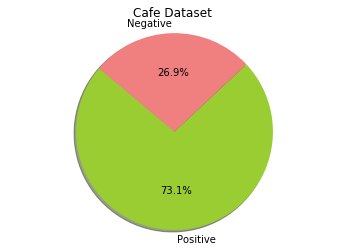

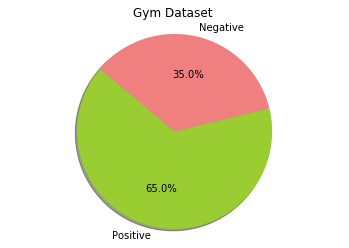

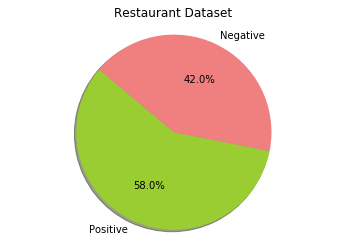

In [2]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#Cafe Dataset
# Data to plot
labels = ['Positive', 'Negative']
sizes = [len(cafe_dataset[cafe_dataset['Category']=='Positive']),len(cafe_dataset[cafe_dataset['Category']=='Negative'])]
colors = ['yellowgreen', 'lightcoral']
explode = (0, 0,)  # explode 1st slice

# Plot
plt.title('Cafe Dataset ')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#Gym Dataset
# Data to plot
labels = ['Positive', 'Negative']
sizes = [len(gym_dataset[gym_dataset['Category']=='Positive']),len(gym_dataset[gym_dataset['Category']=='Negative'])]
colors = ['yellowgreen', 'lightcoral']
explode = (0, 0,)  # explode 1st slice

# Plot
plt.title('Gym Dataset ')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Restaurant Dataset
# Data to plot
labels = ['Positive', 'Negative']
sizes = [len(restaurants_dataset[restaurants_dataset['Category']=='Positive']),len(restaurants_dataset[restaurants_dataset['Category']=='Negative'])]
colors = ['yellowgreen', 'lightcoral']
explode = (0, 0,)  # explode 1st slice

# Plot
plt.title('Restaurant Dataset ')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<h1>Models Stats<h1>

Text(0.5, 1.0, 'Cafe Dataset Accuracy Score')

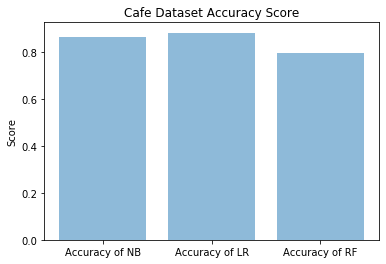

In [3]:
import numpy as np
#Cafe Data Set
objects = ('Accuracy of NB' , 'Accuracy of LR','Accuracy of RF')
y_pos = np.arange(len(objects))
performance = [acc_score_nb_cafe,acc_score_lr_cafe,acc_score_rf_cafe]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Cafe Dataset Accuracy Score')





Text(0.5, 1.0, 'Cafe Dataset Precision Score')

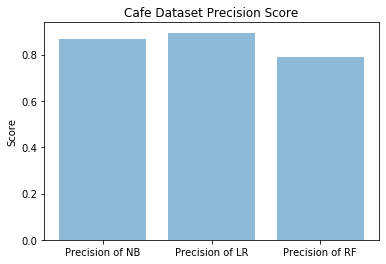

In [4]:
objects = ('Precision of NB' , 'Precision of LR','Precision of RF')
y_pos = np.arange(len(objects))
performance = [pre_score_nb_cafe,pre_score_lr_cafe,pre_score_rf_cafe]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Cafe Dataset Precision Score')



Text(0.5, 1.0, 'Cafe Dataset Recall Score')

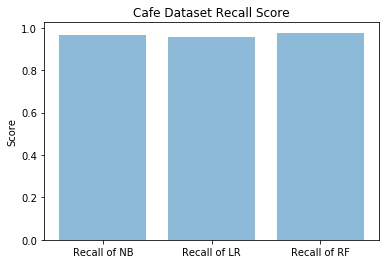

In [5]:
objects = ('Recall of NB' , 'Recall of LR','Recall of RF')
y_pos = np.arange(len(objects))
performance = [rec_score_nb_cafe,rec_score_lr_cafe,rec_score_rf_cafe]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Cafe Dataset Recall Score')

<h3>Explanation For Cafe Dataset</h3>
<hr>
<h5>In analysis of cafe dataset, we observed that naive bayes and logistic regression are most accurate than radom forest algorthim. Taking precision into account, logistic regression has most accuracy. In terms of recall accuracy, both naive bayes and logistic regression plays equal role. In general we can say that both naive bayes and logistic regression are better than random forest in analysis of cafe data-set</h5>

Text(0.5, 1.0, 'Gym Dataset Accuracy Score')

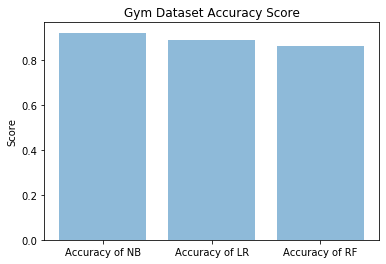

In [6]:
#Gym Data Set
objects = ('Accuracy of NB' , 'Accuracy of LR','Accuracy of RF')
y_pos = np.arange(len(objects))
performance = [acc_score_nb_gym,acc_score_lr_gym,acc_score_rf_gym]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Gym Dataset Accuracy Score')

Text(0.5, 1.0, 'Gym Dataset Precision Score')

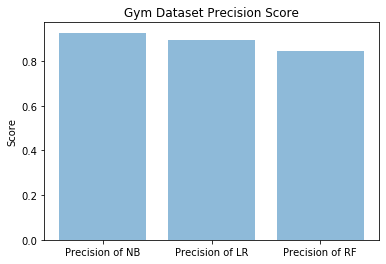

In [7]:
objects = ('Precision of NB' , 'Precision of LR','Precision of RF')
y_pos = np.arange(len(objects))
performance = [pre_score_nb_gym,pre_score_lr_gym,pre_score_rf_gym]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Gym Dataset Precision Score')

Text(0.5, 1.0, 'Gym Dataset Recall Score')

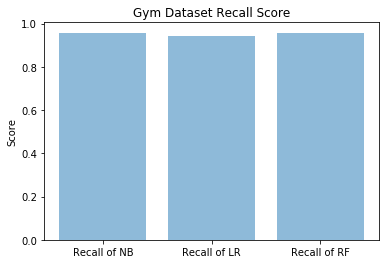

In [8]:
objects = ('Recall of NB' , 'Recall of LR','Recall of RF')
y_pos = np.arange(len(objects))
performance = [rec_score_nb_gym,rec_score_lr_gym,rec_score_rf_gym]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Gym Dataset Recall Score')

<h3>Explanation For Gym Dataset</h3>
<hr>
<h5>In analysis of gym dataset, we observed that logistic regression is most accurate than other two algorthims. Taking precision into account, naive bayes has most accuracy. In terms of recall accuracy, both random forest and logistic regression plays equal role. In general we can say that logistic regression is better for gym dataset</h5>

Text(0.5, 1.0, 'Restaurant Dataset Accuracy Score')

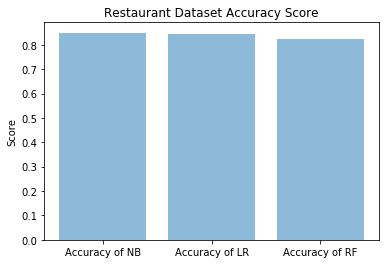

In [9]:
#Restaurant Data Set
objects = ('Accuracy of NB' , 'Accuracy of LR','Accuracy of RF')
y_pos = np.arange(len(objects))
performance = [acc_score_nb_restaurant,acc_score_lr_restaurant,acc_score_rf_restaurant]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Restaurant Dataset Accuracy Score')

Text(0.5, 1.0, 'Restaurant Dataset Accuracy Score')

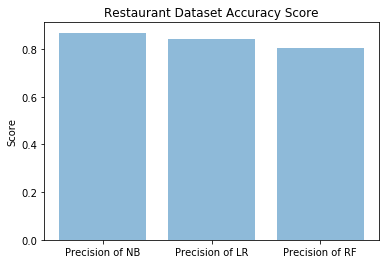

In [10]:
objects = ('Precision of NB' , 'Precision of LR','Precision of RF')
y_pos = np.arange(len(objects))
performance = [pre_score_nb_restaurant,pre_score_lr_restaurant,pre_score_rf_restaurant]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Restaurant Dataset Accuracy Score')

Text(0.5, 1.0, 'Restaurant Dataset Accuracy Score')

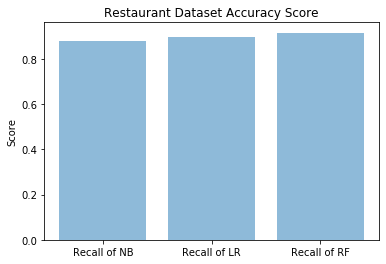

In [11]:
objects = ('Recall of NB' , 'Recall of LR','Recall of RF')
y_pos = np.arange(len(objects))
performance = [rec_score_nb_restaurant,rec_score_lr_restaurant,rec_score_rf_restaurant]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Restaurant Dataset Accuracy Score')

<h3>Explanation For Restaurant Dataset</h3>
<hr>
<h5>In analysis of restaurant dataset, we observed that logistic regression and naive bayes are most accurate than random forest algorthims. Taking precision into account, logistic regression has most accuracy. In terms of recall accuracy, random forest is most accurate. In general we can say that both naive bayes and logistic regression are better than random forest in analysis of restaurant data-set</h5>

<hr><br><br><h2>Summary</h2>

<h3>By using text classifiers, companies can structure business information such as email, legal documents, web pages, chat conversations, and social media messages in a fast and cost-effective way. This allows companies to save time when analyzing text data, help inform business decisions, and automate business processes. So in order to study text classification in practical, we fetch revies of some business in order to see what most of the customers said about them</h3>
<h3>For this, we scrape the data from website. After that, we clean the data into proper format so they can be processed by machine learning models perfectly. When all this stuff is done, we train and test the models. Now with help of these models, we can classify upcoming reviewes of business and create an insight about them</h3>